In [1]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
data_dir = "data/Normal/"
img_names = os.listdir(data_dir)
img_names = [data_dir + x for x in img_names]
img_names

['data/Normal/ITIA1144.tif',
 'data/Normal/ITIA1145.tif',
 'data/Normal/ITIA1141.tif',
 'data/Normal/ITIA1142.tif',
 'data/Normal/ITIA1143.tif']

In [3]:
from utils.DataLoader import DataLoader

In [4]:
def show_image(image):
    plt.imshow(image,cmap="gray")

In [9]:
DL = DataLoader("/data")
DataLoader.show_image_from_path("data/cropped28/img-0.tif")

TypeError: __init__() missing 1 required positional argument: 'data_dir'

In [151]:
def create_image_array(image_names):
    img_array = []
    for img in image_names:
        im2arr = io.imread(img)
        img_array.append(im2arr)
    return np.array(img_array)

In [155]:
images = create_image_array(img_names)

In [174]:
images[0].shape[:2]

(700, 1024)

In [186]:
from keras.datasets import mnist
(x,y),(a,b) = mnist.load_data()

In [203]:
np.ones((50000)).shape

(50000,)

In [171]:
cropped = images[0][0:64,0:64]

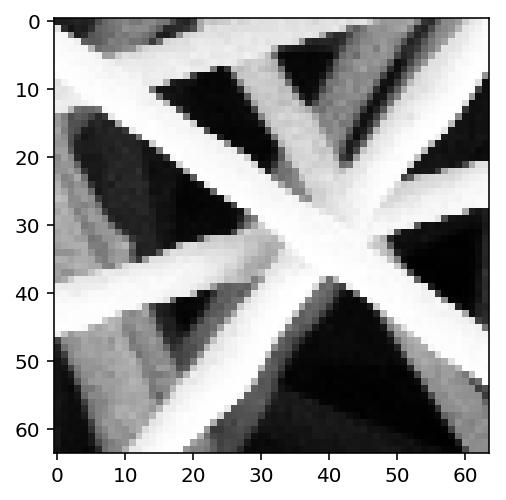

In [172]:
show_image(cropped)

In [178]:
def generate_random_cropped_images(image,size,num_images):
    imgs = []
    h, w = image.shape[:2]
    new_h, new_w = size, size
    for idx in range(num_images):
        top = np.random.randint(0,h-new_h)
        left = np.random.randint(0,w - new_w)
        img = image[top: top+ new_h, left:left+new_w]
        imgs.append(img)
    return np.array(imgs)
    
    

In [183]:
test = generate_random_cropped_images(images[0],64,5)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

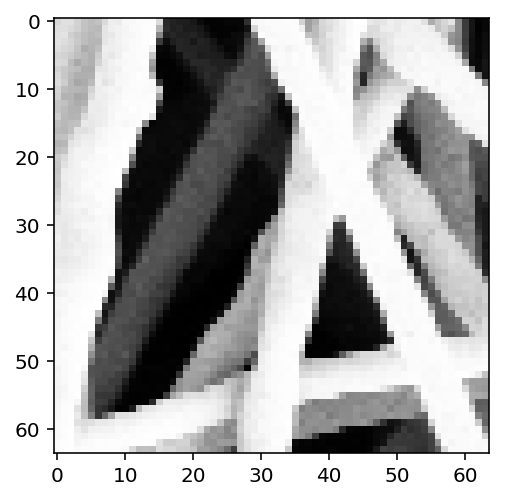

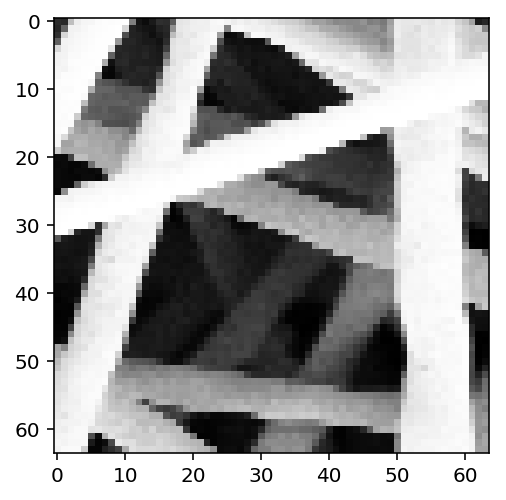

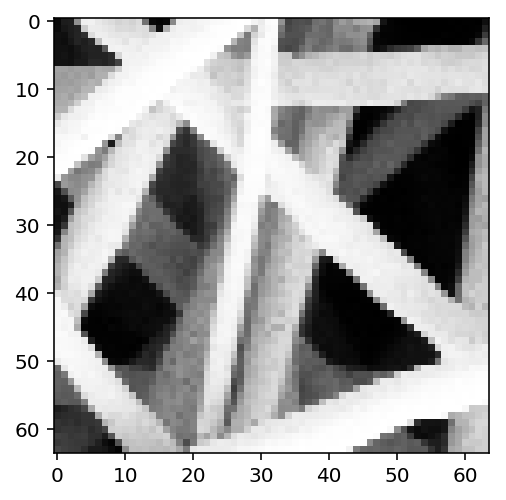

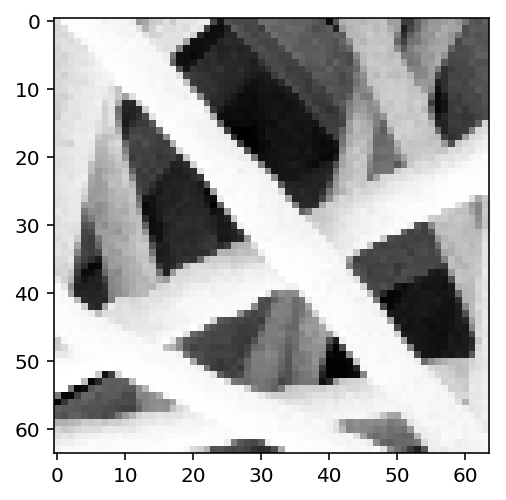

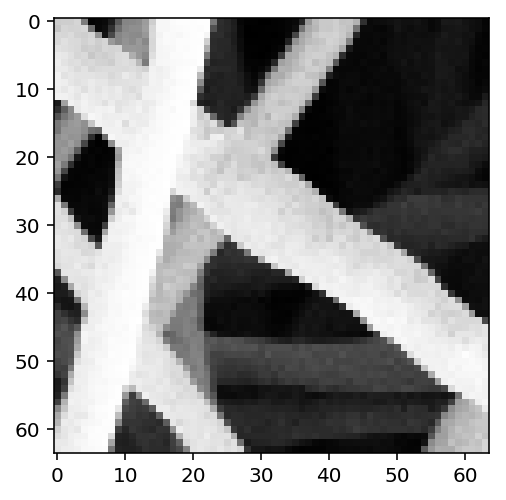

In [184]:
for i in test:
    plt.figure()
    show_image(i)

In [194]:
# %load utils/DataLoader.py

import os
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image
from utils.utils import working_directory

class DataLoader(object):

    def __init__(self,data_dir):
        self.data_dir = data_dir
        self.image_names = os.listdir(self.data_dir)
        self.merged = [self.data_dir + x for x in self.image_names]
        self.images_orig = self.create_image_array(self.merged)

    def show_image(self,image):
        plt.imshow(image, cmap="gray")

    def create_image_array(self,img_names):
        img_array = []
        for img in img_names:
            im2arr = io.imread(img)
            img_array.append(im2arr)
        return np.array(img_array)

    def generate_sub_dataset(self,size,num_images,save=False):
        print("DataLoader: generating new dataset")
        imgs = []
        for ind,img in enumerate(self.images_orig):
            h, w = img.shape[:2]
            new_h, new_w = size, size
            for idx in range(num_images):
                top = np.random.randint(0, h - new_h)
                left = np.random.randint(0, w - new_w)
                image = img[top: top + new_h, left:left + new_w]
                imgs.append(image)
            print("{} images generated".format(num_images * (ind+1)))
        if save:
            with working_directory("./data"):
                # TODO check if it is created
                os.mkdir("cropped")
            with working_directory("./data/cropped"):
                for idx,img in enumerate(imgs):
                    im = Image.fromarray(img)
                    im.save("img-" +str(idx)+ ".tif")
        return imgs

    def get_images(self):
        return self.images_orig



In [213]:
data_dir = "data/Normal/"
d = DataLoader(data_dir)
d.generate_sub_dataset(28,10000,save=True)

DataLoader: generating new dataset
10000 images generated
20000 images generated
30000 images generated
40000 images generated
50000 images generated


[array([[199, 207, 192, 174, 160, 174, 163, 156, 163, 157, 154, 192, 225,
         235, 239, 239, 243, 242, 163,  76,  71,  61,  42,  22,  42,  47,
          44,  53],
        [202, 196, 195, 188, 181, 172, 169, 162, 167, 159, 149, 200, 217,
         235, 241, 243, 244, 237, 154,  75,  64,  30,  28,  32,  57,  55,
          75, 114],
        [202, 199, 201, 201, 191, 177, 176, 181, 172, 160, 165, 202, 227,
         235, 236, 242, 242, 239, 141,  43,  28,  33,  36,  59, 102, 107,
         109, 115],
        [191, 212, 200, 199, 185, 197, 186, 177, 174, 173, 171, 215, 230,
         237, 241, 243, 242, 237, 188, 108,  63, 106, 106, 110, 107, 116,
         123, 122],
        [ 30,  88, 198, 200, 195, 176, 185, 184, 190, 180, 173, 217, 230,
         240, 241, 242, 243, 242, 191, 184, 178, 177, 152, 121, 116, 119,
         115, 128],
        [ 64,  65,  69, 123, 201, 196, 187, 190, 187, 179, 184, 225, 231,
         238, 245, 243, 236, 233, 187, 174, 173, 180, 187, 188, 152, 132,
         133

In [209]:
x = d.get_images()

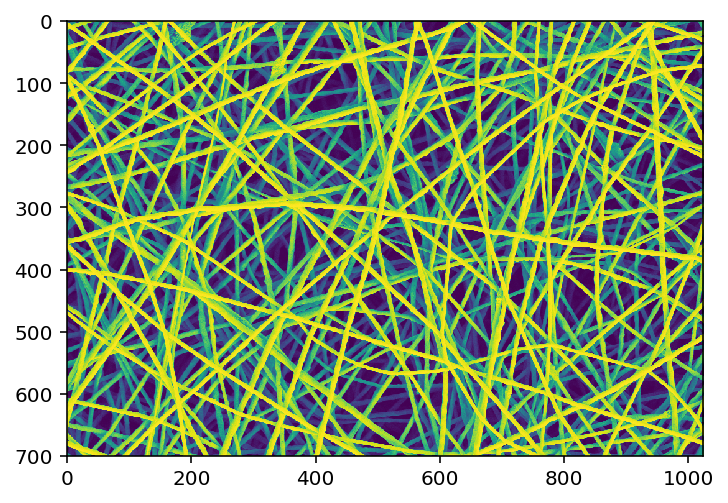

In [206]:
x_train.shape

(45000, 64, 64)

In [207]:
x_test.shape

(45000,)